# Polynomial Regression

In [6]:
import numpy as np 
np.set_printoptions(precision=3)
import pandas as pd 
pd.set_option('display.precision',3)
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Importing the dataset
bike = pd.read_csv('day.csv')
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344,0.364,0.806,0.160,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363,0.354,0.696,0.249,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196,0.189,0.437,0.248,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200,0.212,0.590,0.160,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.227,0.229,0.437,0.187,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254,0.227,0.653,0.350,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253,0.255,0.590,0.155,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253,0.242,0.753,0.124,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.256,0.232,0.483,0.351,364,1432,1796


In [8]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
Data = bike[['cnt', 'temp']]
Data.describe()

,cnt,temp
count,731.000,731.000
mean,4504.349,0.495
std,1937.211,0.183
min,22.000,0.059
25%,3152.000,0.337
50%,4548.000,0.498
75%,5956.000,0.655
max,8714.000,0.862


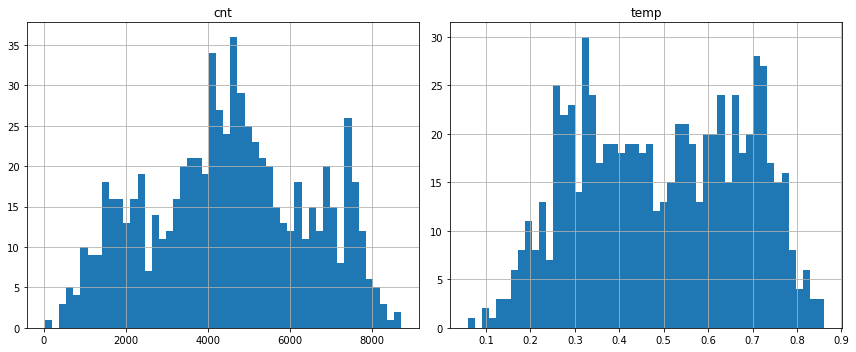

In [10]:
Data.hist(bins=50, figsize=(12, 5))
plt.tight_layout()

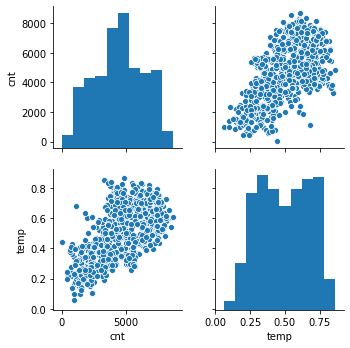

In [11]:
sns.pairplot(Data)

In [12]:
data = Data.sample(n=30).reset_index()

### 1) Train-Test Split

In [13]:
N= data.shape[0]
test = np.random.choice(np.arange(N),20, replace=False)
train_df = data[~data.index.isin(test)].copy()
test_df = data[data.index.isin(test)].copy()
print(train_df.shape, test_df.shape)

(10, 3) (20, 3)


In [14]:
y = np.matrix(data['cnt']).T
X = np.matrix(data['temp']).T
y_train = np.matrix(train_df['cnt']).T
X_train = np.matrix(train_df['temp']).T
y_test = np.matrix(test_df['cnt']).T
X_test = np.matrix(test_df['temp']).T

### 2) Design Matrix 만들기

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [16]:
for i in range(0, 12):
    poly = PolynomialFeatures(degree=i)
    globals()['X_train_poly{0}'.format(i)] = poly.fit_transform(X_train)
    globals()['X_test_poly{0}'.format(i)] = poly.fit_transform(X_test)

### 3) Linear Regression Fitting

#### train mse

In [20]:
for i in range(0,12):
    globals()['lin{0}'.format(i)] = LinearRegression(fit_intercept=False)
    globals()['lin{0}'.format(i)].fit(globals()['X_train_poly{0}'.format(i)],y_train)

In [21]:
trainmse = np.zeros(12)

In [23]:
for i in range(0,12):
    err = (y_train - np.dot(globals()['X_train_poly{0}'.format(i)],globals()['lin{0}'.format(i)].coef_.T))
    trainmse[i] = np.log(np.dot(err.T, err)/10)

In [24]:
trainmse

array([ 15.618,  14.08 ,  14.023,  13.853,  13.852,  13.836,  13.819,
        13.445,  12.969, -17.032, -19.13 , -20.646])

#### test mse

In [33]:
testmse = np.zeros(12)

In [34]:
for i in range(0,12):
    err = (y_test - np.dot(globals()['X_test_poly{0}'.format(i)], globals()['lin{0}'.format(i)].coef_.T))
    testmse[i] = np.log(np.dot(err.T, err)/10)

### MSE 그래프 그리기

In [35]:
M = np.arange(0,12)

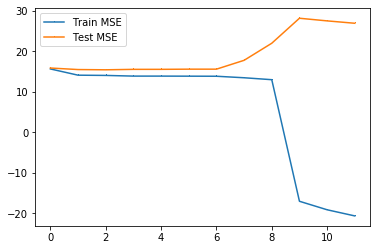

In [37]:
plt.plot(M, trainmse, marker=',', label="Train MSE")
plt.plot(M, testmse, marker=',', label="Test MSE")
plt.legend();